In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [18]:
def pca_n_rf(X, y, n_pca = 50,n_estimators = 300, PC1 = 0, PC2 = 1):
    
    # Standardizing the data
    X = StandardScaler().fit_transform(X)
    
    # PCA
    pca = PCA(n_components = n_pca)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents)
    PCA_df = pd.concat([principalDf, y], axis = 1)
    
    pca_X = PCA_df.drop('label', axis = 1).values
    pca_y = PCA_df['label'].values
    X_train, X_test, y_train, y_test = train_test_split(pca_X, pca_y, test_size = 0.3,random_state = 109) # 70% training and 30% test
    
    # Creating a Random Forest Classifier
    classifier = RandomForestClassifier(n_estimators, criterion = 'entropy')
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    
    
    PCA_df["label"].replace({0: "Fake", 1: 'Real'}, inplace=True)
    # Scatter plot of PC0 and PC1
    plt.figure(figsize = (12, 8))
    sns.scatterplot(x = PC1, y = PC2, data = PCA_df,  hue="label")
    plt.title('PC0 vs PC1')
    # Set x-axis label
    plt.xlabel('PC1')
    # Set y-axis label
    plt.ylabel('PC0')

In [3]:
# get last layer vector
vector_data = pd.read_csv('custom_model.csv')
# shuffle
vector_data = vector_data.sample(frac = 1).reset_index(drop = True)

In [4]:
X = vector_data.drop('label', axis = 1).values
y = vector_data['label']

Accuracy: 0.9667
Precision: 0.9569871289729446
Recall: 0.9769390628142388


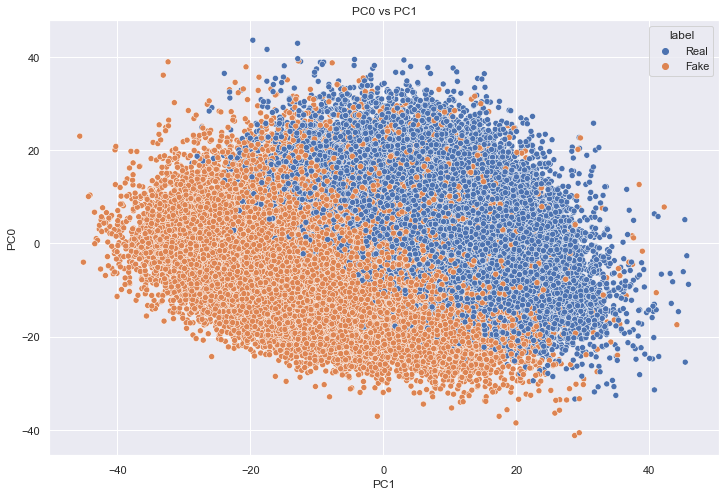

In [19]:
pca_n_rf(X, y)

In [20]:
def pca_n_svm(x,y, n_pca = 50, kernel = 'rbf', PC1 = 0, PC2 = 1):
    
    # standardize data
    x = StandardScaler().fit_transform(x)
    
    # PCA
    pca = PCA(n_components = n_pca)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)
    PCA_df = pd.concat([principalDf, y], axis = 1)
    
    pca_x = PCA_df.drop('label', axis = 1).values
    pca_y = PCA_df['label'].values
    X_train, X_test, y_train, y_test = train_test_split(pca_x, pca_y, test_size=0.3,random_state = 109) # 70% training and 30% test
    
    #Create a svm Classifier
    clf1 = SVC(kernel = kernel) # Polynomial Kernel
    clf1.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    
    
    PCA_df1["label"].replace({0: "Fake", 1: 'Real'}, inplace=True)
    # Scatter plot of PC0 and PC1
    plt.figure(figsize = (12, 8))
    sns.scatterplot(x=PC1, y=PC2, data=PCA_df1,  hue="label")
    #plt.title('PC0 vs PC1')
    # Set x-axis label
    plt.xlabel('PC' + str(PC1))
    # Set y-axis label
    plt.ylabel('PC' + str(PC2))

Accuracy: 0.9820333333333333
Precision: 0.9806766515110992
Recall: 0.9832405979754643


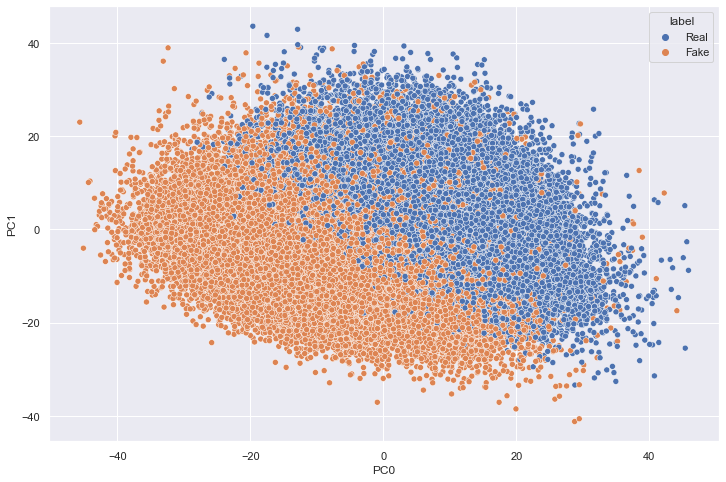

In [17]:
pca_n_svm(X, y)